In [1]:
import argparse
import os
import numpy as np
import sys
from torchvision import models
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid
from torch.utils.data import DataLoader
from torch.autograd import Variable
from models import * #models.pyを読み込む
from test_dataset import * #datasets2.pyを読み込む
import torch.nn as nn
import torch.nn.functional as F
import torch

In [2]:
os.makedirs("images", exist_ok=True)
os.makedirs("saved_models", exist_ok=True)

In [3]:
hr_height=128
hr_width=128
channels=3
batch_size=4
lr=0.0002
b1=0.5
b2=0.999
n_cpu=8

In [4]:
cuda = torch.cuda.is_available()

hr_shape = (hr_height, hr_width)

# Initialize generator and discriminator
generator = GeneratorResNet()
discriminator = Discriminator(input_shape=(channels, *hr_shape))
feature_extractor = FeatureExtractor()

# Set feature extractor to inference mode
feature_extractor.eval()

FeatureExtractor(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3

In [5]:
# Losses
criterion_GAN = torch.nn.MSELoss()
criterion_content = torch.nn.L1Loss()

if cuda:
    generator = generator.cuda()
    discriminator = discriminator.cuda()
    feature_extractor = feature_extractor.cuda()
    criterion_GAN = criterion_GAN.cuda()
    criterion_content = criterion_content.cuda()

In [6]:
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor

dataloader = DataLoader(
    ImageDataset(),
    batch_size=batch_size,
    shuffle=True,
    num_workers=n_cpu,
)

In [7]:
generator.load_state_dict(torch.load("saved_models/generator_199.pth"))
for i, imgs in enumerate(dataloader):
    # Configure model input
    imgs_lr = Variable(imgs["lr"].type(Tensor))
    imgs_hr = Variable(imgs["hr"].type(Tensor))

    gen_hr = generator(imgs_lr)
    break
print(gen_hr)
print(gen_hr.shape)
print(type(gen_hr))

tensor([[[[-9.9410e-03, -2.2513e-02, -3.4251e-02,  ..., -2.0408e-02,
           -3.8180e-02, -6.7101e-03],
          [-1.4977e-02,  1.4274e-04, -1.1453e-02,  ..., -1.1925e-02,
            5.6499e-03,  4.3420e-03],
          [-1.4389e-02,  2.8390e-02,  5.6231e-03,  ..., -8.9401e-03,
           -7.1259e-03, -2.4234e-02],
          ...,
          [-2.3064e-01,  9.9768e-01,  9.9280e-01,  ..., -9.9913e-01,
           -9.9160e-01, -8.2760e-01],
          [ 9.9465e-01,  9.9878e-01,  9.1500e-01,  ..., -9.8883e-01,
            6.7798e-01,  9.3313e-01],
          [-9.9847e-01, -9.9873e-01, -9.9960e-01,  ...,  9.0317e-01,
            9.9991e-01,  9.9470e-01]],

         [[-9.3165e-02, -1.0298e-01, -6.7387e-02,  ..., -9.5606e-02,
           -8.4294e-02, -1.0573e-01],
          [-8.0119e-02, -1.1172e-01, -1.1119e-01,  ..., -9.9355e-02,
           -1.2776e-01, -1.1396e-01],
          [-9.6892e-02, -1.2665e-01, -1.2676e-01,  ..., -1.2296e-01,
           -1.0160e-01, -1.0054e-01],
          ...,
     

In [8]:
gen_hr = gen_hr.to('cpu').detach().numpy().copy()
imgs_hr = imgs_hr.to('cpu').detach().numpy().copy()
imgs_lr = imgs_lr.to('cpu').detach().numpy().copy()

In [9]:
print(imgs_lr.shape)
print(type(imgs_hr))
print(imgs_hr.shape)
print(type(imgs_hr))
print(gen_hr.shape)
print(type(gen_hr))

(4, 3, 32, 32)
<class 'numpy.ndarray'>
(4, 3, 128, 128)
<class 'numpy.ndarray'>
(4, 3, 128, 128)
<class 'numpy.ndarray'>


In [10]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [11]:
mean = np.array([0.002, 0.199, -5.710])
std = np.array([0.676, 1.901, 35.074])

In [12]:
a=2

sr = gen_hr[a]
hr = imgs_hr[a]
lr = imgs_lr[a]

In [13]:
print(lr.shape)
print(hr.shape)
print(sr.shape)

(3, 32, 32)
(3, 128, 128)
(3, 128, 128)


In [14]:
nx = 32
ny = 32
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [15]:
lr_v = lr[0]*std[0]+mean[0]
lr_u = lr[1]*std[1]+mean[1]
lr_p = lr[2]*std[2]+mean[2]

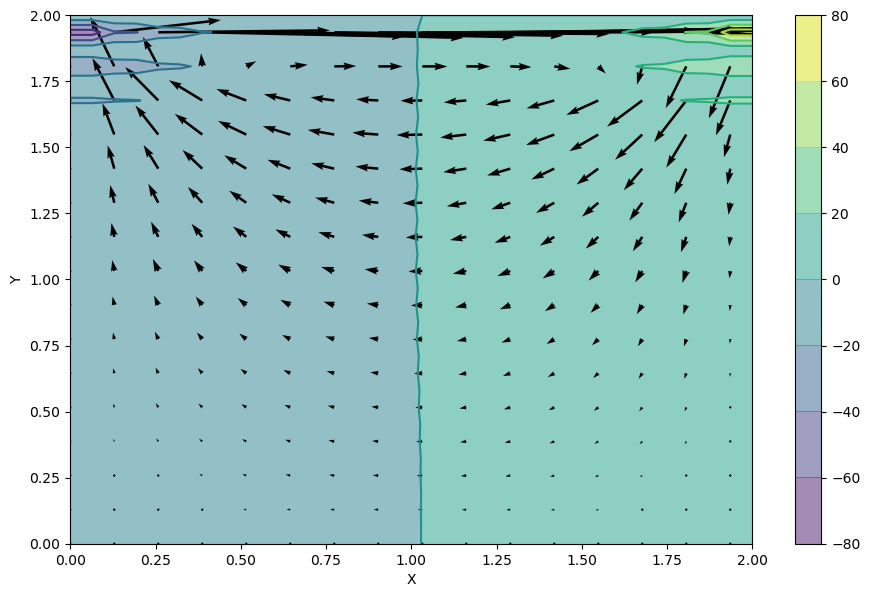

In [16]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, lr_p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, lr_p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], lr_u[::2, ::2], lr_v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');

In [17]:
nx = 128
ny = 128
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [18]:
lr_v = lr_v.repeat(4, axis=0).repeat(4, axis=1)
lr_u = lr_u.repeat(4, axis=0).repeat(4, axis=1)
lr_p = lr_p.repeat(4, axis=0).repeat(4, axis=1)

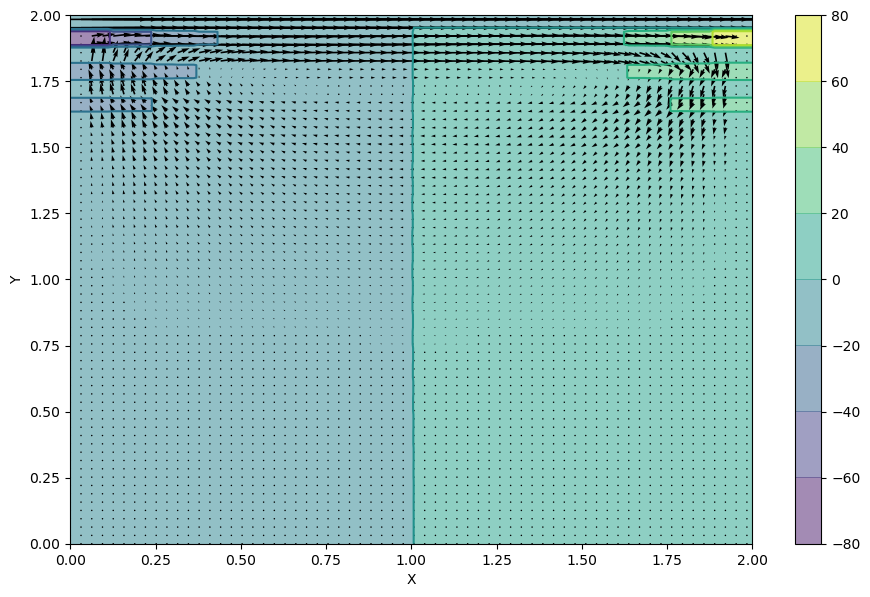

In [19]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, lr_p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, lr_p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], lr_u[::2, ::2], lr_v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');

In [20]:
hr_v = hr[0]*std[0]+mean[0]
hr_u = hr[1]*std[1]+mean[1]
hr_p = hr[2]*std[2]+mean[2]

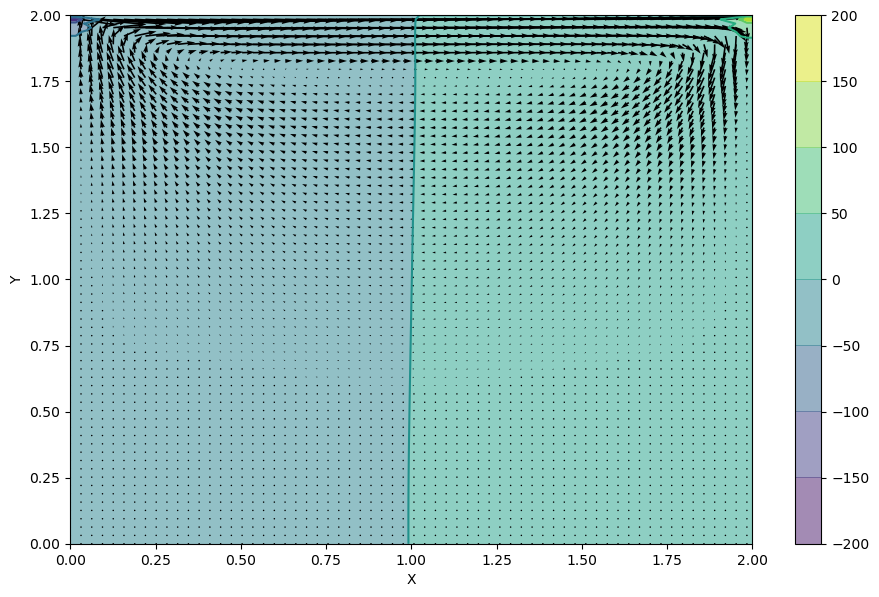

In [21]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, hr_p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, hr_p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], hr_u[::2, ::2], hr_v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');

In [22]:
sr_v = sr[0]*std[0]+mean[0]
sr_u = sr[1]*std[1]+mean[1]
sr_p = sr[2]*std[2]+mean[2]

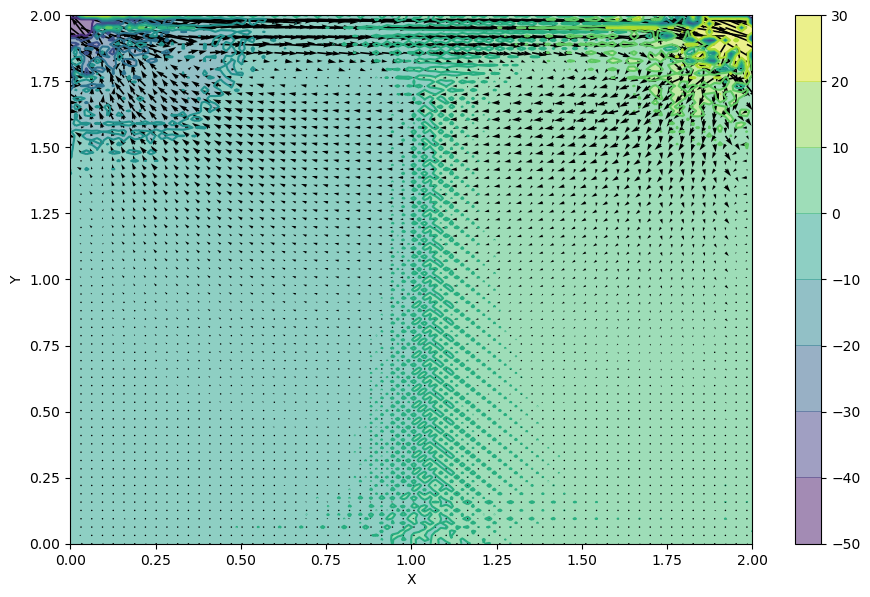

In [23]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, sr_p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, sr_p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], sr_u[::2, ::2], sr_v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');

In [24]:
def mse(y, t):
    return round(0.5 * np.sum((y - t) **2), 2)

In [25]:
print("v")
print(mse(sr_v, hr_v), mse(lr_v, hr_v))

print("u")
print(mse(sr_u, hr_u), mse(lr_u, hr_u))

print("p")
print(mse(sr_p, hr_p), mse(lr_p, hr_p))

v
34.65 8.21
u
157.31 129.32
p
199289.89 303128.06
